# Allysa Webber

## Research question/interests
Research question 1: Are community well being values significantly correlated with community demographics?
Research question 2: Are there significant differences in the mean temperature and snowfall values in January across the years?
Research question 3: How do snowfall and temperature values interact with each other?
Research question 4: What is the spacial distribution of temperature and snowfall values in british columbia?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#import the wellbeing files
wellbeingindex = pd.read_csv('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/CWindex.csv', encoding="ISO-8859-1")

In [ ]:
#take a look at the well being files
wellbeingindex.head()

In [8]:
wellbeingindex.describe()

,CSD Code / Code de la SDR 2011,Census Population / Population de recensement 2011,GNR / TGN 2011,Income / Revenu 2011,Education / Scolarité 2011,Housing / Logement 2011,Labour Force Activity / Activité sur le marché du travail 2011,CWB / IBC 2011
count,5.253000e+03,4.417000e+03,4417.000000,3752.000000,3752.000000,3752.000000,3752.000000,4417.000000
mean,3.649022e+06,7.572630e+03,38.447272,69.635661,51.707623,90.972548,82.924574,73.063844
std,1.617802e+06,6.054266e+04,15.691078,10.595555,11.534866,10.357334,9.275051,9.303556
min,1.001101e+06,6.500000e+01,0.000000,21.000000,6.000000,27.000000,33.000000,26.000000
25%,2.438055e+06,3.950000e+02,27.400000,66.000000,46.000000,91.000000,78.750000,70.000000
50%,3.558075e+06,8.990000e+02,39.500000,71.000000,53.000000,94.000000,85.000000,75.000000
75%,4.718809e+06,2.634000e+03,49.800000,76.000000,59.000000,96.000000,89.000000,79.000000
max,6.208098e+06,2.615060e+06,88.600000,100.000000,89.000000,100.000000,100.000000,93.000000


In [ ]:
wellbeingindex['CWB'].max(),wellbeingindex['CWB'].min()

In [ ]:
#clean up the files
wellbeingindex = wellbeingindex.apply(lambda x: x.replace({'Non-Indigenous Community / Communauté non-Autochtone':'Non-Indigenous Community',
                            'First Nations Community / Communauté des Premières Nations':'First Nations Community',
                           'Inuit Community / Communauté inuite': 'Inuit Community'}, regex=True))

In [ ]:
wellbeingindex=wellbeingindex.rename(columns={'Community Type / Type de communauté 2011': 'Community Type',
                            'CWB / IBC 2011': 'CWB'})

In [ ]:
#visualize 
plt.figure(figsize=(6,6))
sns.set(font_scale=.9)
wellbeingindex_plot = sns.boxplot(x=wellbeingindex['CWB'],
                                    y = wellbeingindex['Community Type'],
                                     ).set(ylabel='Community Wellbeing Index', xlabel='Community type')

In [11]:
#import and concat the climate files with a loop
files= (glob('/Users/allysawebber/Documents/School/data301/data/*'))
df_list=[]

for i in files:
    print(i)
    df=pd.read_csv(i)
    df['year']=i[-8:-4]
    print(df)
    df_list.append(df)
df=pd.concat(df_list)

/Users/allysawebber/Documents/School/data301/data/climate2018.csv
        Long     Lat                Stn_Name  Clim_ID Prov_or_Ter    Tm  DwTm  \
0   -123.742  48.935               CHEMAINUS  1011500          BC   5.1   0.0   
1   -124.133  48.824  COWICHAN LAKE FORESTRY  1012040          BC   3.2   0.0   
2   -124.052  48.829           LAKE COWICHAN  1012055          BC   3.8  13.0   
3   -123.226  48.425        DISCOVERY ISLAND  1012475          BC   NaN   NaN   
4   -123.439  48.432       ESQUIMALT HARBOUR  1012710          BC   6.7   0.0   
..       ...     ...                     ...      ...         ...   ...   ...   
232 -122.597  58.836           FORT NELSON A  1192946          BC -18.5   0.0   
233 -122.574  58.841             FORT NELSON  1192948          BC -18.3   0.0   
234 -130.025  58.426        DEASE LAKE (AUT)  119BLM0          BC -15.5   0.0   
235 -133.700  59.567                   ATLIN  1200560          BC -11.4   2.0   
236 -136.367  59.450           PLEASANT CAM

In [6]:
#make sure they all imported
df['year'].unique()

array(['2018', '2019', '2022', '2023', '2021', '2020', '2011', '2012',
       '2013', '2017', '2016', '2014', '2015'], dtype=object)

In [82]:
#take a look at the files
df.head()

,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Tm,DwTm,D,Tx,DwTx,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,year
0,-123.742,48.935,CHEMAINUS,1011500,BC,5.1,0.0,NaN,11.5,0.0,...,0.0,NaN,0.0,25.0,NaN,NaN,NaN,400.2,0.0,2018
1,-124.133,48.824,COWICHAN LAKE FORESTRY,1012040,BC,3.2,0.0,-0.2,12.5,0.0,...,0.0,159.0,0.0,23.0,NaN,NaN,NaN,460.3,0.0,2018
2,-124.052,48.829,LAKE COWICHAN,1012055,BC,3.8,13.0,0.3,12.0,8.0,...,12.0,NaN,NaN,19.0,NaN,NaN,NaN,254.9,0.0,2018
3,-123.226,48.425,DISCOVERY ISLAND,1012475,BC,NaN,NaN,NaN,12.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,-123.439,48.432,ESQUIMALT HARBOUR,1012710,BC,6.7,0.0,NaN,11.9,0.0,...,0.0,NaN,NaN,21.0,NaN,NaN,NaN,351.6,0.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-122.597,58.836,FORT NELSON A,1192946,BC,-15.2,0.0,NaN,7.0,0.0,...,0.0,NaN,39.0,11.0,NaN,NaN,NaN,1028.9,0.0,2015
278,-122.573,58.841,FORT NELSON UA,1192950,BC,-14.5,0.0,NaN,3.0,0.0,...,0.0,NaN,44.0,7.0,NaN,NaN,NaN,1006.9,0.0,2015
279,-130.025,58.426,DEASE LAKE (AUT),119BLM0,BC,-10.4,0.0,NaN,5.9,0.0,...,0.0,NaN,50.0,10.0,NaN,NaN,NaN,880.7,0.0,2015
280,-133.700,59.567,ATLIN,1200560,BC,-6.9,0.0,5.9,6.0,0.0,...,0.0,127.0,19.0,8.0,NaN,NaN,NaN,771.3,0.0,2015


In [15]:
df.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

In [13]:
####some cleaning
#get rid of all other provinces
df= df[df['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df =(df.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N'],axis=1)
     .rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip'})
     .sort_values(by='year', ascending = True, inplace = True))
#rename columns
#df=df.rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip'})
#reorder rows by year
#df.sort_values(by='year', ascending = True, inplace = True)

In [14]:
df.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

In [86]:
#df['Precip'] = df['Precip'].astype('int')
floatPrecip=pd.to_numeric(df[df['Precip'].notnull()]['Precip'], errors='coerce')
# floatPrecip[floatPrecip.isnull()]
dfPrecip = pd.DataFrame(floatPrecip)
dfPrecip
dfPrecip =dfPrecip.rename(columns={'Precip': 'Precip2'}) 
# df['Precip'] = df['Precip'].astype(str).astype(int)
# df['Precip'].unique
newframe = pd.concat([df, dfPrecip], axis='index')
newframe

,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Temp,D,Snow,Precip,year,Precip2
263,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,0.4,64.0,72.6,2011,NaN
169,-123.093,49.171,RICHMOND NATURE PARK,1106PF7,BC,4.3,0.3,0.0,157.7,2011,NaN
170,-123.303,49.106,SANDHEADS CS,1107010,BC,5.1,NaN,NaN,NaN,2011,NaN
171,-123.122,49.295,VANCOUVER HARBOUR CS,1108446,BC,4.8,NaN,NaN,255.6,2011,NaN
172,-123.182,49.195,VANCOUVER INT'L A,1108447,BC,4.2,0.1,16.1,186.3,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.7
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.4


In [14]:
#check min and max in the dataframe
#df['Temp'].max(),df['Temp'].min()

#df['Snow'].max(), df['Snow'].min()

#df['Precip'].max(),  df['Precip'].max()  

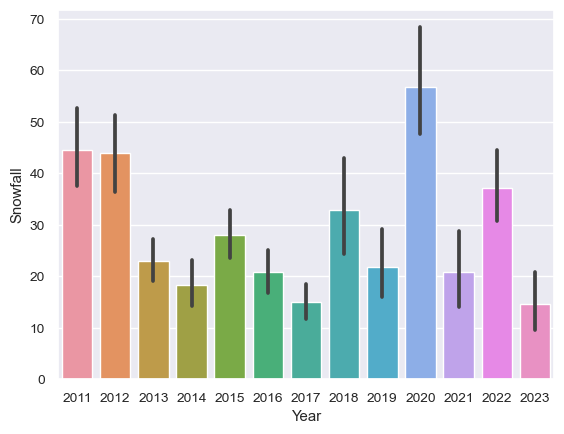

In [87]:
#look at snowfall in january across the years
sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Snow'],
                                      x = df['year']
                                     ).set(ylabel='Snowfall', xlabel='Year')

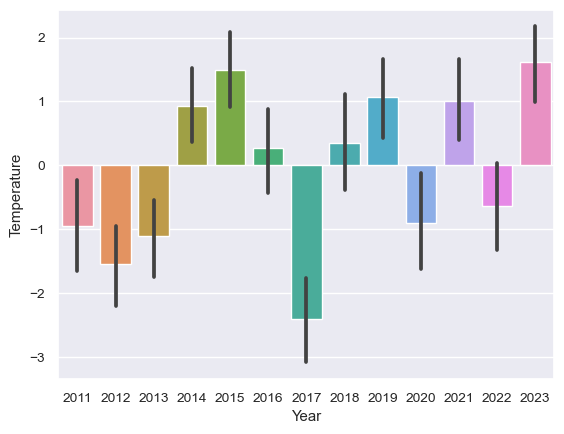

In [88]:
#look at temperature in january across the years
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
temp_plot = sns.barplot(y=df['Temp'],
                                      x = df['year']
                                     ).set(ylabel='Temperature', xlabel='Year')

In [82]:
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
precip_plot = sns.point(y=newframe['Precip2'],
                                      x = newframe['year']
                                     ).set(ylabel='Temperature', xlabel='Year')

AttributeError: module 'seaborn' has no attribute 'point'

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

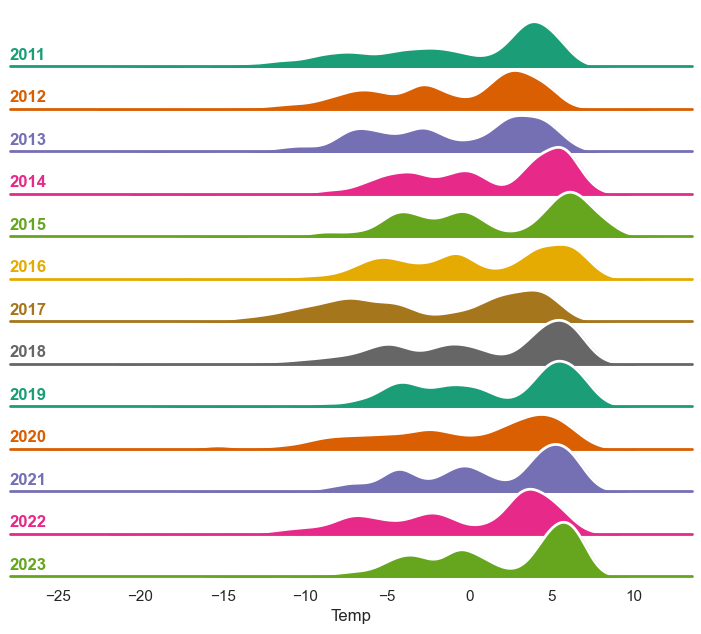

In [97]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Temp",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Temp", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Temp")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

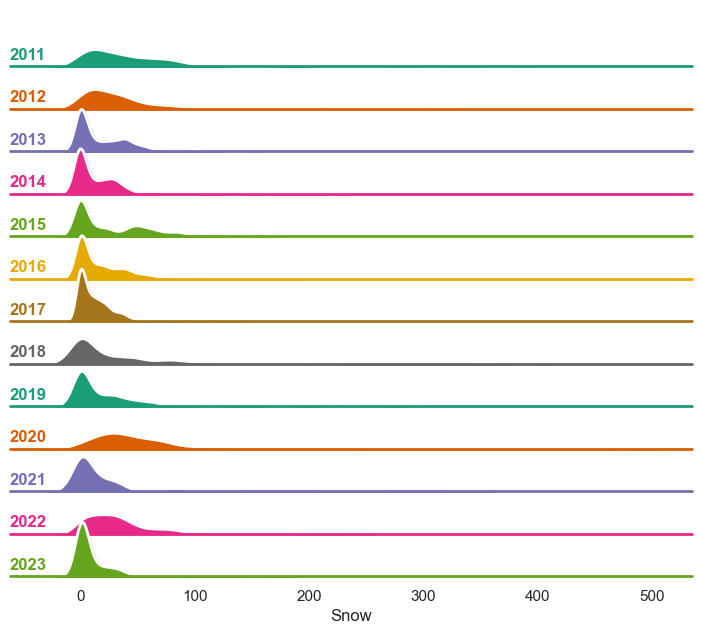

In [92]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Snow",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Snow", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Snow")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [54]:
#look at how snowfall and temperature interact
meantemp = df.groupby('year')['Temp'].mean()
meantemp = pd.DataFrame(meantemp)

meansnow = df.groupby('year')['Snow'].mean()
meansnow = pd.DataFrame(meansnow)

meansdf = pd.merge(meansnow, meantemp, how="outer", on=['year'])
meansdf['Year'] = meansdf.index
meansdf

,Snow,Temp,Year
year,,,
2011,44.624309,-0.945935,2011
2012,43.885641,-1.539552,2012
2013,22.887245,-1.113688,2013
2014,18.304762,0.936466,2014
2015,27.992391,1.491635,2015
2016,20.772515,0.265504,2016
2017,15.040127,-2.406148,2017
2018,32.858394,0.355752,2018
2019,21.826772,1.062281,2019


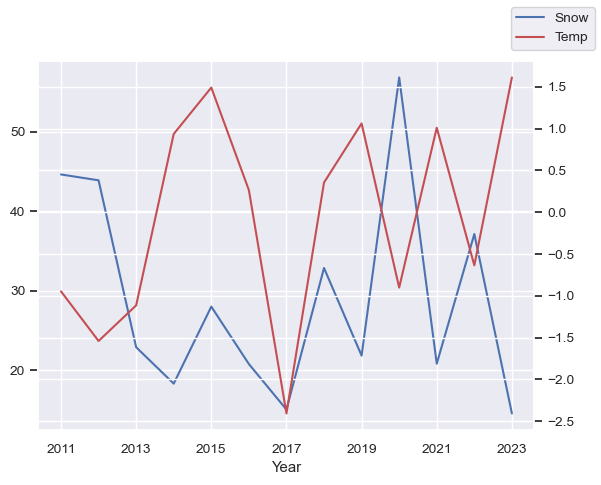

In [50]:
ax = newframe.plot(x="Year", y="Snow", legend=False)
ax2 = ax.twinx()
newframe.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

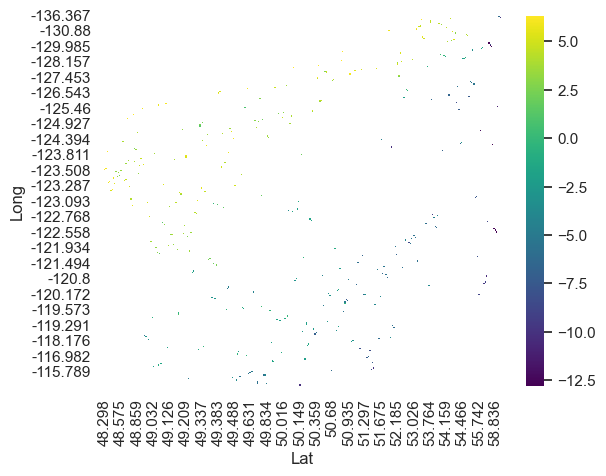

In [125]:
#try a heat map to show locations of temperatures. How has the distribution of temps changed through the years
result = df.reset_index().pivot_table(index='Long', columns='Lat', values='Temp')

sns.heatmap(result, annot=False, cmap='viridis', robust=True)
plt.show()


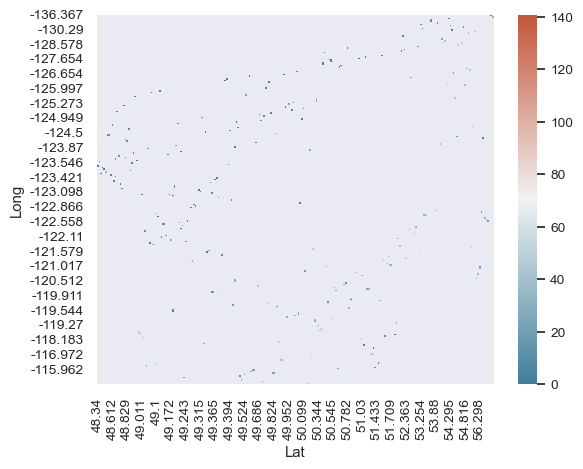

In [132]:
snow = df.reset_index().pivot_table(index='Long', columns='Lat', values='Snow')

sns.heatmap(snow, annot=False, cmap = sns.diverging_palette(230, 20, as_cmap=True), robust=True)
plt.show()

In [102]:
meantemp.head()

year
2011   -0.945935
2012   -1.539552
2013   -1.113688
2014    0.936466
2015    1.491635
Name: Temp, dtype: float64